# Rede Neural Convolucional- personagens

# importação das biblioteca

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
tf.__version__

'2.14.0'

# Carregamento das Imagens

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Bases de dados/personagens.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

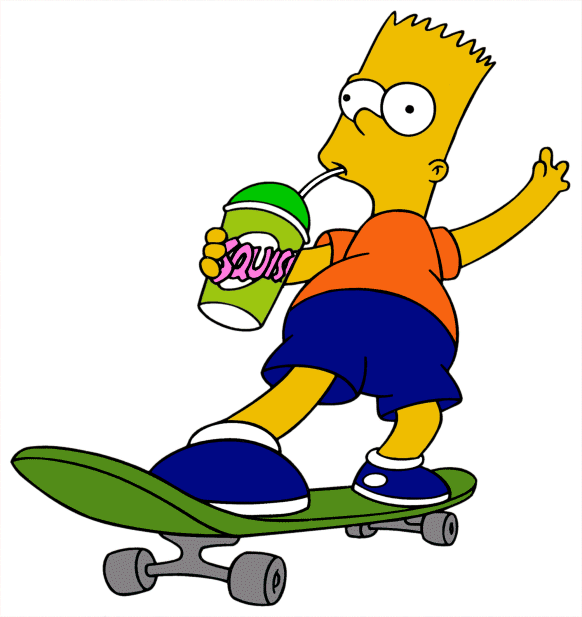

In [ ]:
tf.keras.preprocessing.image.load_img(r'//content/training_set/bart/bart146.bmp')

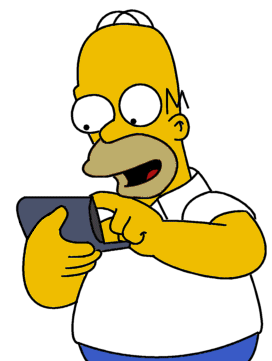

In [ ]:
tf.keras.preprocessing.image.load_img(r'//content/training_set/homer/homer106.bmp')

# **Construção das bases de treinamento e teste**

In [ ]:

gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)
base_treinamento = gerador_treinamento.flow_from_directory('/content/training_set',
                                                           target_size = (64, 64),
                                                           batch_size = 8,
                                                           class_mode = 'categorical')

Found 196 images belonging to 2 classes.


In [ ]:
gerador_teste = ImageDataGenerator(rescale=1./255)
base_teste = gerador_teste.flow_from_directory('/content/training_set',
                                                     target_size = (64, 64),
                                                     batch_size = 8,
                                                     class_mode = 'categorical',
                                                      shuffle = False)

Found 196 images belonging to 2 classes.


In [ ]:
base_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
base_treinamento.class_indices

{'bart': 0, 'homer': 1}

# **Construção e Treinamento da Rede Neural**

In [ ]:
rede_neural = Sequential()
rede_neural.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Conv2D(32, (3,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 4, activation='relu'))
rede_neural.add(Dense(units = 4, activation='relu'))
rede_neural.add(Dense(units = 2, activation='softmax'))



In [ ]:
rede_neural.compile(optimizer='adam', loss='categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
rede_neural.fit_generator(base_treinamento, epochs=100, validation_data=base_teste)

Epoch 1/100


<ipython-input-13-2b818c09c6a1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  rede_neural.fit_generator(base_treinamento, epochs=100, validation_data=base_teste)


25/25 [==============================] - 5s 112ms/step - loss: 0.6740 - accuracy: 0.5969 - val_loss: 0.6720 - val_accuracy: 0.6020
Epoch 2/100
25/25 [==============================] - 2s 72ms/step - loss: 0.6536 - accuracy: 0.6020 - val_loss: 0.6569 - val_accuracy: 0.6020
Epoch 3/100
25/25 [==============================] - 2s 71ms/step - loss: 0.6243 - accuracy: 0.6020 - val_loss: 0.6056 - val_accuracy: 0.6020
Epoch 4/100
25/25 [==============================] - 2s 70ms/step - loss: 0.6073 - accuracy: 0.6122 - val_loss: 0.6522 - val_accuracy: 0.6020
Epoch 5/100
25/25 [==============================] - 2s 70ms/step - loss: 0.5869 - accuracy: 0.6122 - val_loss: 0.5447 - val_accuracy: 0.6939
Epoch 6/100
25/25 [==============================] - 2s 67ms/step - loss: 0.5718 - accuracy: 0.6888 - val_loss: 0.5846 - val_accuracy: 0.6020
Epoch 7/100
25/25 [==============================] - 3s 132ms/step - loss: 0.5565 - accuracy: 0.6071 - val_loss: 0.5208 - val_accuracy: 0.6582
Epoch 8/100
25/2

# **Avaliação de Rede Neural**

In [ ]:
previsoes = rede_neural.predict(base_teste)
previsoes

25/25 [==============================] - 1s 27ms/step


array([[9.99999940e-01, 2.01933680e-17],
       [9.99999940e-01, 1.79766459e-08],
       [9.99999940e-01, 1.52054762e-16],
       [9.99999940e-01, 1.13497451e-14],
       [9.99999940e-01, 9.48872452e-20],
       [9.99999940e-01, 4.89961072e-10],
       [9.99999940e-01, 4.09426626e-08],
       [9.99999940e-01, 1.36614207e-26],
       [9.99999940e-01, 4.64371404e-08],
       [9.99999940e-01, 5.30734106e-21],
       [9.99999940e-01, 3.08750359e-08],
       [9.99999940e-01, 6.57901036e-15],
       [9.99999940e-01, 1.62717444e-11],
       [9.99999940e-01, 1.15296186e-22],
       [9.99999940e-01, 1.56651038e-19],
       [9.99999940e-01, 3.05430442e-12],
       [9.99999940e-01, 1.21741337e-21],
       [9.99999940e-01, 7.55342663e-11],
       [9.99999940e-01, 1.45292800e-15],
       [9.99999940e-01, 3.16913678e-08],
       [9.99993622e-01, 6.31037210e-06],
       [9.99999940e-01, 3.73931548e-27],
       [9.99999940e-01, 4.28347738e-15],
       [9.99914467e-01, 8.54177342e-05],
       [9.999948

In [ ]:
import numpy as np


In [ ]:
previsoes2 = np.argmax(previsoes, axis= 1 )
previsoes2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes2, base_teste.classes)

0.9540816326530612

<Axes: >

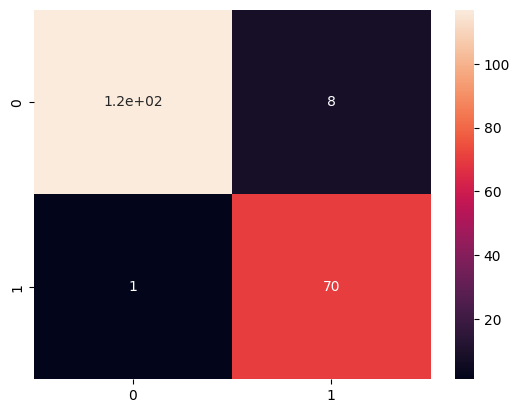

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(previsoes2, base_teste.classes)
sns.heatmap(cm, annot=True)